### Simulation

# Homogeneous Temporal Point Process

In [1]:
import numpy as np

def sample_exponential_numpy(lambda_rate):
    return np.random.exponential(1 / lambda_rate)

def sample_exponential_inverse_transform(lambda_rate):
    u = np.random.uniform(0, 1)
    return -np.log(1 - u) / lambda_rate

def sample_exponential_discretization(lambda_rate, dt=0.01):
    t = 0
    while True:
        t += dt
        if np.random.uniform(0, 1) < lambda_rate * dt:
            return t
        
def sample_exponential_rescale(lambda_rate):
    sample = np.random.exponential(1)
    return sample / lambda_rate

In [20]:
def sample_homogeneous_point_process(h = 10.0, lambda_rate = 1.0):
    # Input: time horizon h > 0, rate lambda > 0
    # Output: list of event times
    events = []
    t = 0
    while t < h:
        # Generate the time to the next event using the exponential distribution
        # !!! In Numpy, the exponential distribution is parameterized with the mean, not the rate. !!!
        delta_t = sample_exponential_numpy(lambda_rate)
        t += delta_t # Update the current time
        if t < h:     # If the updated time is within the time horizon, add it to the list
            events.append(t)
    return events

# Example usage:
time_horizon = 10  # Time horizon h > 0
rate_lambda = 5    # Rate lambda > 0
sample = sample_homogeneous_point_process(time_horizon, rate_lambda)
print("Sampled event times:", sample)


Sampled event times: [0.052970330985942664, 0.0839448899130574, 0.13553648131054974, 0.3522820033718662, 0.8881112716735275, 1.2603757040404155, 1.6647128694333022, 1.886615704177484, 1.9906392105743316, 2.01097219608186, 2.2944145323609586, 2.3999688945157938, 2.699623229080996, 3.4664977741393574, 3.730090997926645, 3.7440255092525256, 4.6805516957454945, 5.73670706812356, 6.331254832912001, 6.471587550624722, 6.739250768663398, 7.106962908231845, 7.205698949563585, 7.693163228966177, 8.224408412498697, 8.38260165662203, 8.67638113902748, 8.696146219601232, 8.77023525517551, 9.19920993236366, 9.20831417415996, 9.35533606726081, 9.355338646650177, 9.533213739726262, 9.540389783453625, 9.686138475236145, 9.73927117991968, 9.75847981391755]


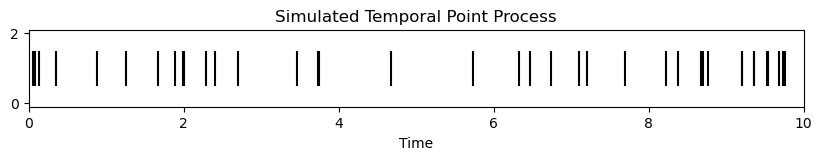

In [21]:
# Plotting the event times
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
plt.eventplot(sample, orientation='horizontal', colors='black')
plt.xlim(0, time_horizon)
plt.xlabel('Time')
plt.title('Simulated Temporal Point Process')
plt.savefig("output.pdf", bbox_inches='tight')
plt.show()


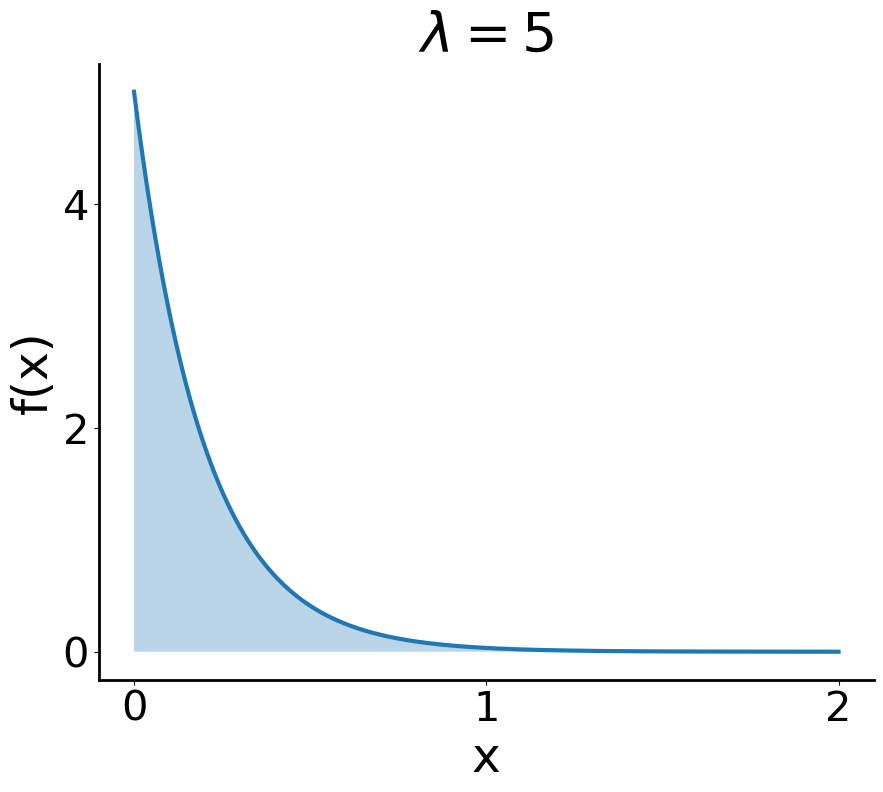

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 5
x = np.linspace(0, 2, 1000)  # Generate 1000 points between 0 and 1
pdf = lambda_param * np.exp(-lambda_param * x)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, pdf, linewidth=3, label=f'$f(x; \lambda={lambda_param})$')
plt.fill_between(x, pdf, alpha=0.3)

# Title and labels
plt.title(r'$\lambda=5$', fontsize=40)
plt.xlabel('x', fontsize=35)
plt.ylabel('f(x)', fontsize=35)

# Adjust tick label size
plt.xticks([0, 1.0, 2.0], fontsize=30)
plt.yticks([0, 2, 4], fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.savefig("exp_rate_5.pdf", bbox_inches='tight')

# Display the plot
plt.show()


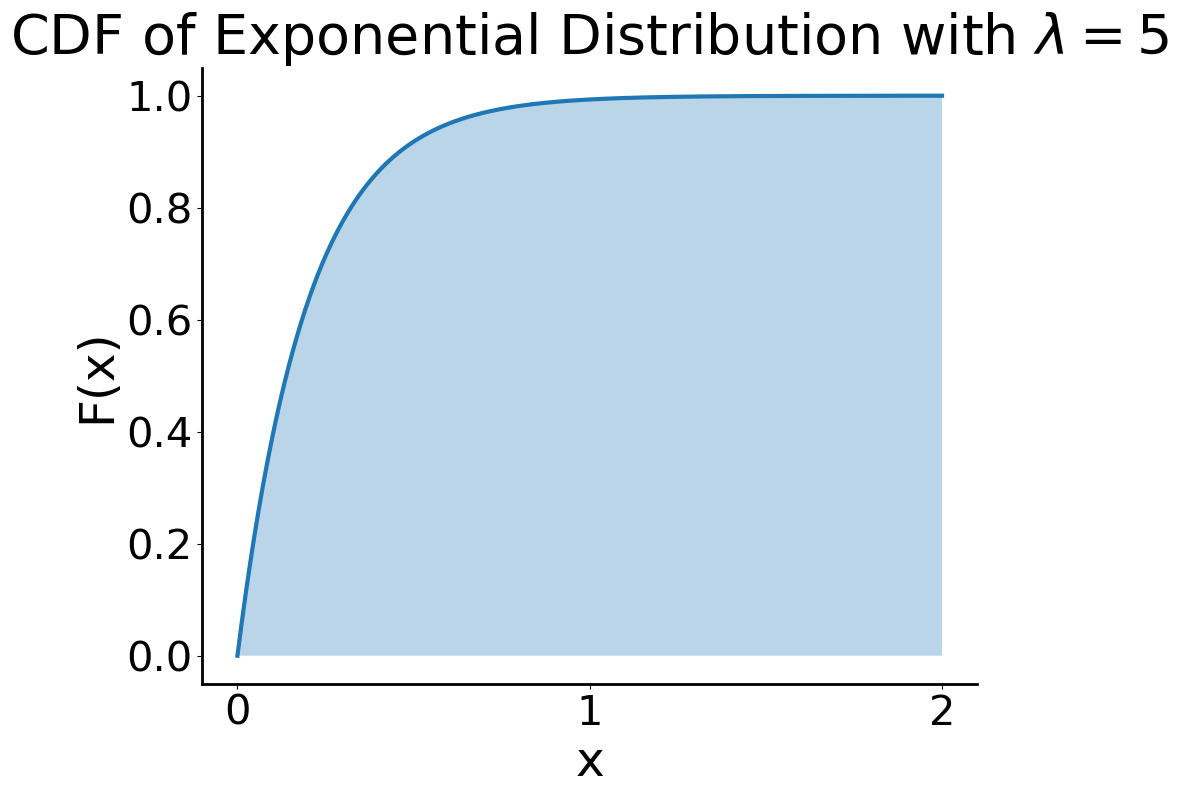

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 5
x = np.linspace(0, 2, 1000)  # Generate 1000 points between 0 and 2
cdf = 1 - np.exp(-lambda_param * x)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, cdf, linewidth=3, label=f'$F(x; \lambda={lambda_param})$')
plt.fill_between(x, cdf, alpha=0.3)

# Title and labels
plt.title(r'$\text{CDF of Exponential Distribution with } \lambda=5$', fontsize=40)
plt.xlabel('x', fontsize=35)
plt.ylabel('F(x)', fontsize=35)

# Adjust tick label size
plt.xticks([0, 1.0, 2.0], fontsize=30)
plt.yticks(np.linspace(0, 1, 6), fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Save the plot
plt.savefig("exp_cdf_5.pdf", bbox_inches='tight')

# Display the plot
plt.show()


/var/folders/2k/47rhbp451xj2d784xjqzm1k40000gn/T/ipykernel_2454/2870810994.py:7: RuntimeWarning: divide by zero encountered in log
  inv_cdf = -np.log(1 - u) / lambda_param


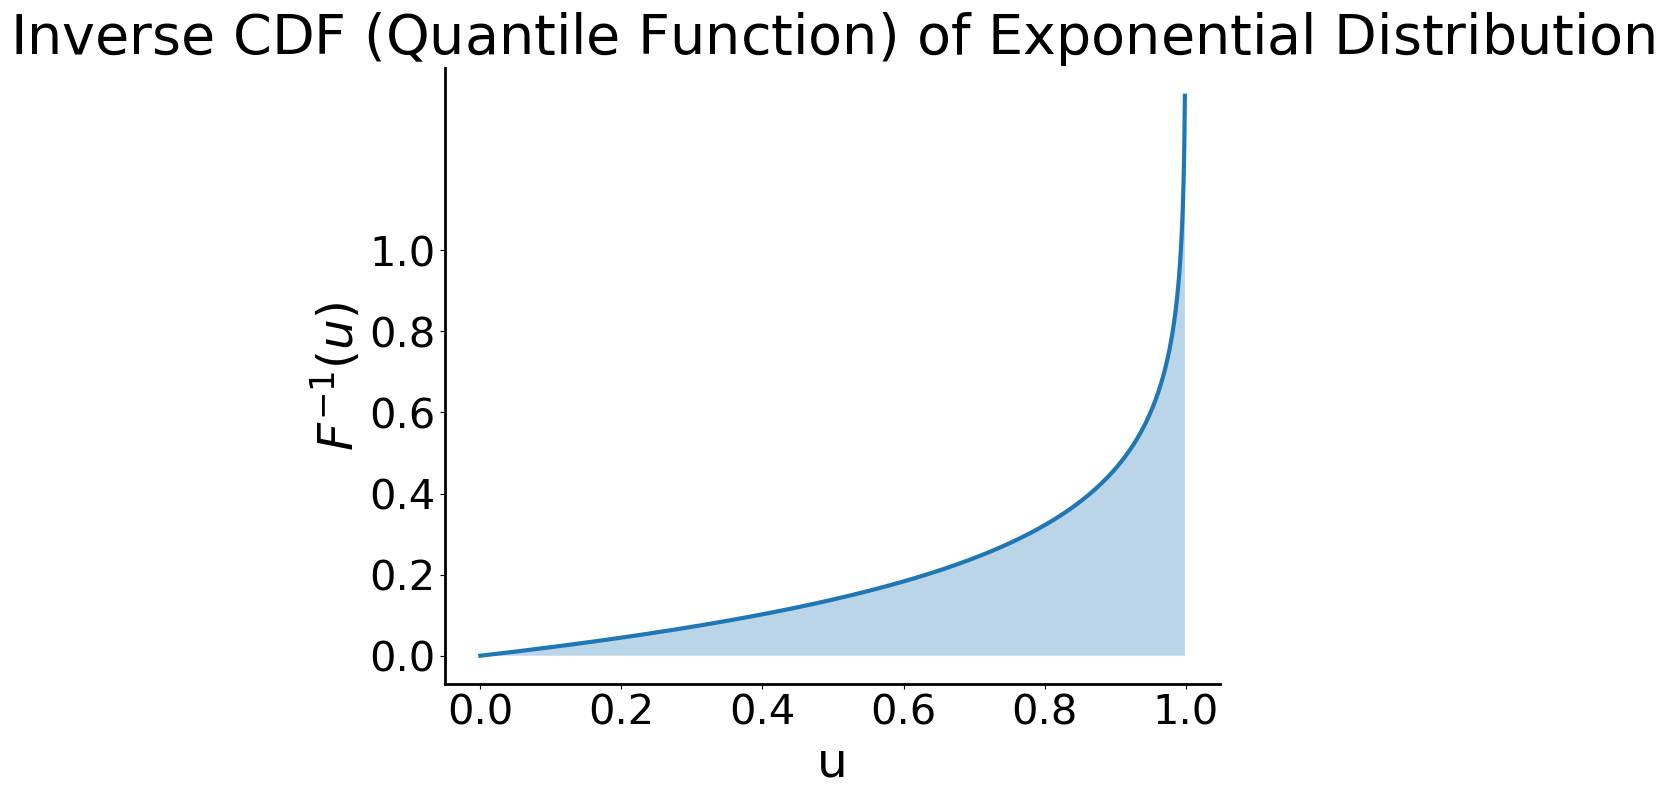

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 5
u = np.linspace(0, 1, 1000)  # Generate 1000 points between 0 and 1
inv_cdf = -np.log(1 - u) / lambda_param

# Plot
plt.figure(figsize=(10, 8))
plt.plot(u, inv_cdf, linewidth=3, label=f'$F^{{-1}}(u; \lambda={lambda_param})$')
plt.fill_between(u, inv_cdf, alpha=0.3)

# Title and labels
plt.title(r'$\text{Inverse CDF (Quantile Function) of Exponential Distribution}$', fontsize=40)
plt.xlabel('u', fontsize=35)
plt.ylabel('$F^{-1}(u)$', fontsize=35)

# Adjust tick label size
plt.xticks(np.linspace(0, 1, 6), fontsize=30)
plt.yticks(np.linspace(0, 1, 6), fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Save the plot
plt.savefig("exp_inv_cdf_5.pdf", bbox_inches='tight')

# Display the plot
plt.show()


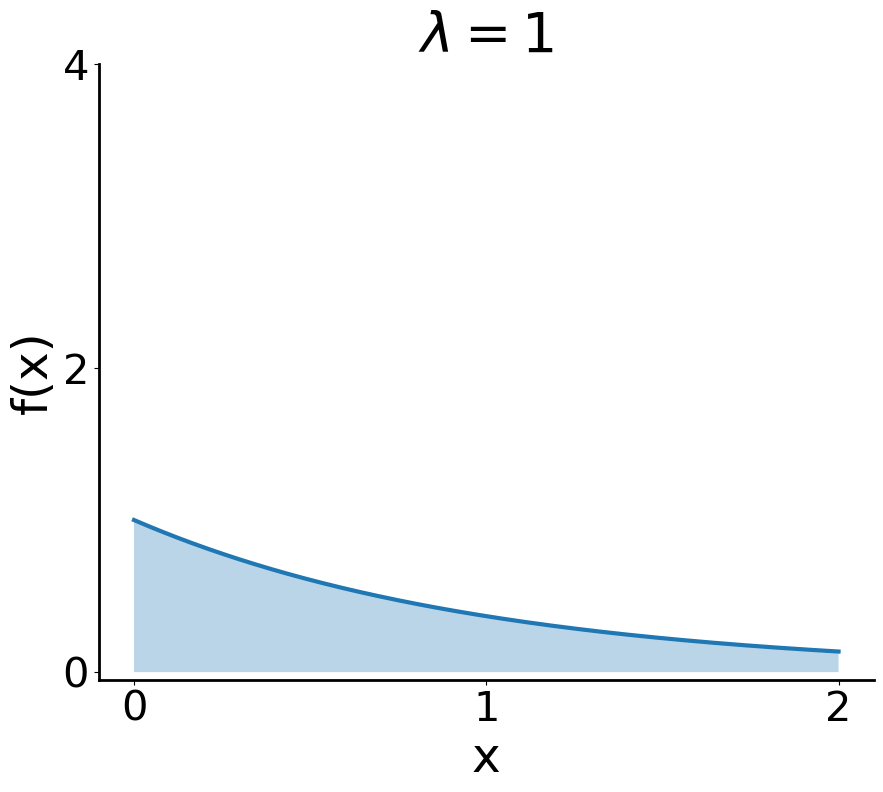

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 1
x = np.linspace(0, 2, 1000)  # Generate 1000 points between 0 and 1
pdf = lambda_param * np.exp(-lambda_param * x)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, pdf, linewidth=3, label=f'$f(x; \lambda={lambda_param})$')
plt.fill_between(x, pdf, alpha=0.3)

# Title and labels
plt.title(r'$\lambda=1$', fontsize=40)
plt.xlabel('x', fontsize=35)
plt.ylabel('f(x)', fontsize=35)

# Adjust tick label size
plt.xticks([0, 1.0, 2.0], fontsize=30)
plt.yticks([0, 2, 4], fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.savefig("exp_rate_1.pdf", bbox_inches='tight')

# Display the plot
plt.show()


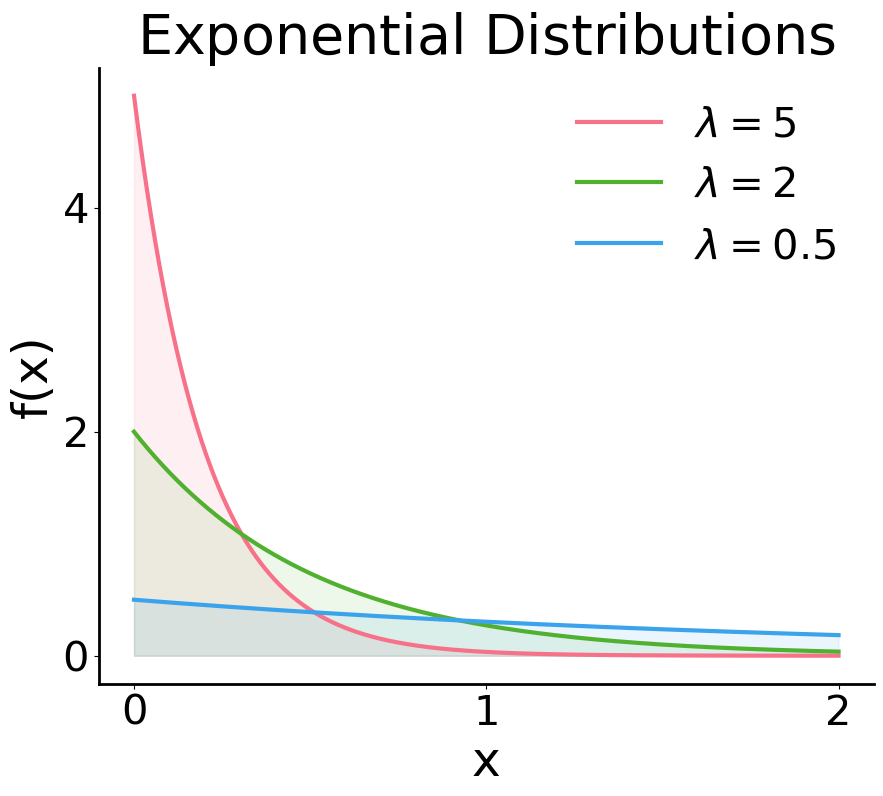

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
lambdas = [5, 2, 0.5]
x = np.linspace(0, 2, 1000)  # Generate 1000 points between 0 and 2

# Seaborn color palette
colors = sns.color_palette("husl", len(lambdas))

# Plot
plt.figure(figsize=(10, 8))

labels = [r'$\lambda=5$', r'$\lambda=2$', r'$\lambda=0.5$']

for lambda_param, color, label in zip(lambdas, colors, labels):
    pdf = lambda_param * np.exp(-lambda_param * x)
    plt.plot(x, pdf, linewidth=3, color=color, label=label)
    plt.fill_between(x, pdf, color=color, alpha=0.1)

# Title and labels
plt.title(r'$\text{Exponential Distributions}$', fontsize=40)
plt.xlabel('x', fontsize=35)
plt.ylabel('f(x)', fontsize=35)

# Adjust tick label size
plt.xticks([0, 1.0, 2.0], fontsize=30)
plt.yticks([0, 2, 4], fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Add legend and remove the box around it
legend = plt.legend(fontsize=30, frameon=False)

# Save the plot
plt.savefig("exp_rates.pdf", bbox_inches='tight')

# Display the plot
plt.show()


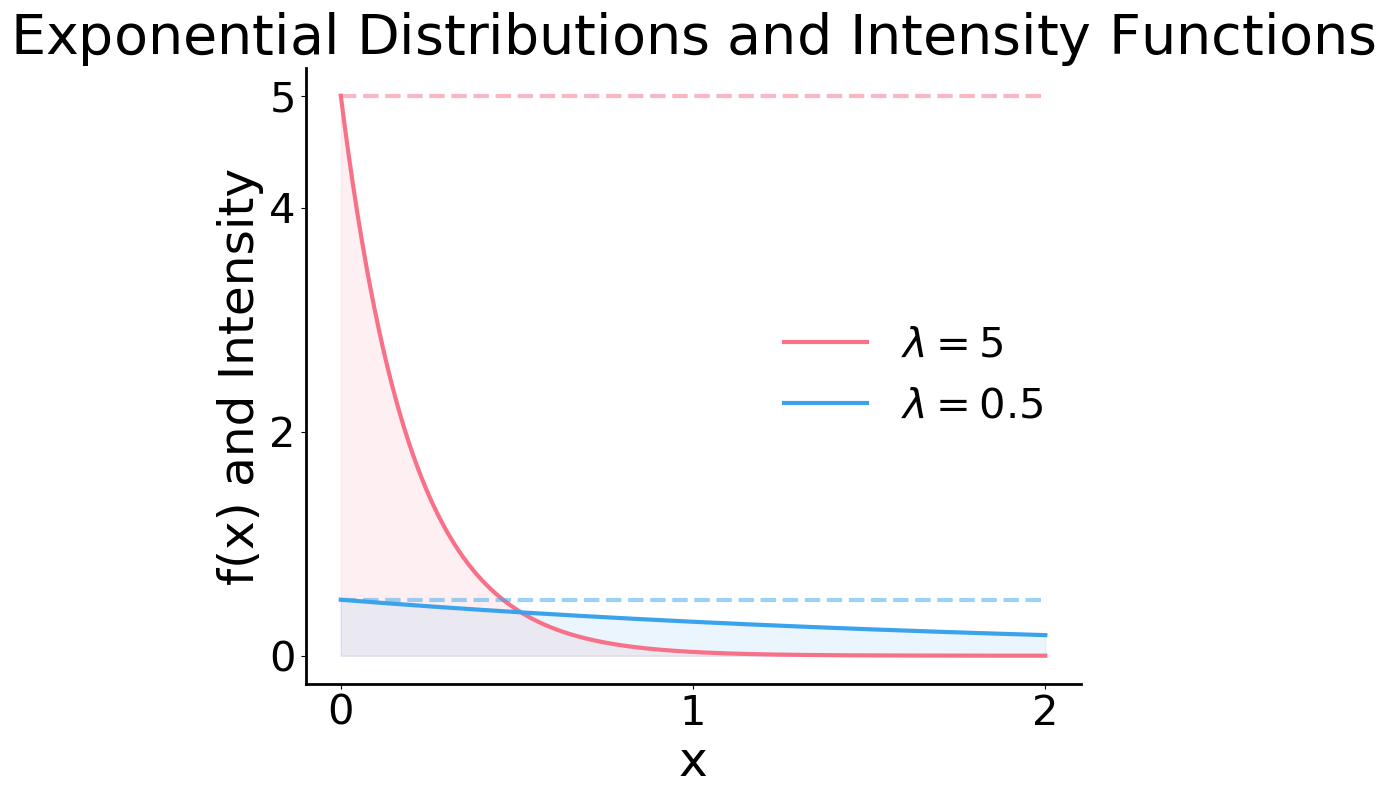

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
lambdas = [5, 2, 0.5]
x = np.linspace(0, 2, 1000)  # Generate 1000 points between 0 and 2

# Seaborn color palette
colors = sns.color_palette("husl", len(lambdas))

# Plot
plt.figure(figsize=(10, 8))

labels = [r'$\lambda=5$', r'$\lambda=2$', r'$\lambda=0.5$']

for lambda_param, color, label in zip(lambdas, colors, labels):
    if label == r'$\lambda=2$':
        continue
    pdf = lambda_param * np.exp(-lambda_param * x)
    plt.plot(x, pdf, linewidth=3, color=color, label=label)
    plt.fill_between(x, pdf, color=color, alpha=0.1)
    # Plot the intensity function
    intensity = np.full_like(x, lambda_param)
    plt.plot(x, intensity, linestyle='--', linewidth=3, color=color, alpha=0.5)

# Title and labels
plt.title(r'$\text{Exponential Distributions and Intensity Functions}$', fontsize=40)
plt.xlabel('x', fontsize=35)
plt.ylabel('f(x) and Intensity', fontsize=35)

# Adjust tick label size
plt.xticks([0, 1.0, 2.0], fontsize=30)
plt.yticks([0, 2, 4, 5], fontsize=30)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Add legend and remove the box around it
legend = plt.legend(fontsize=30, frameon=False)

# Save the plot
plt.savefig("exp_rates_and_intensities.pdf", bbox_inches='tight')

# Display the plot
plt.show()


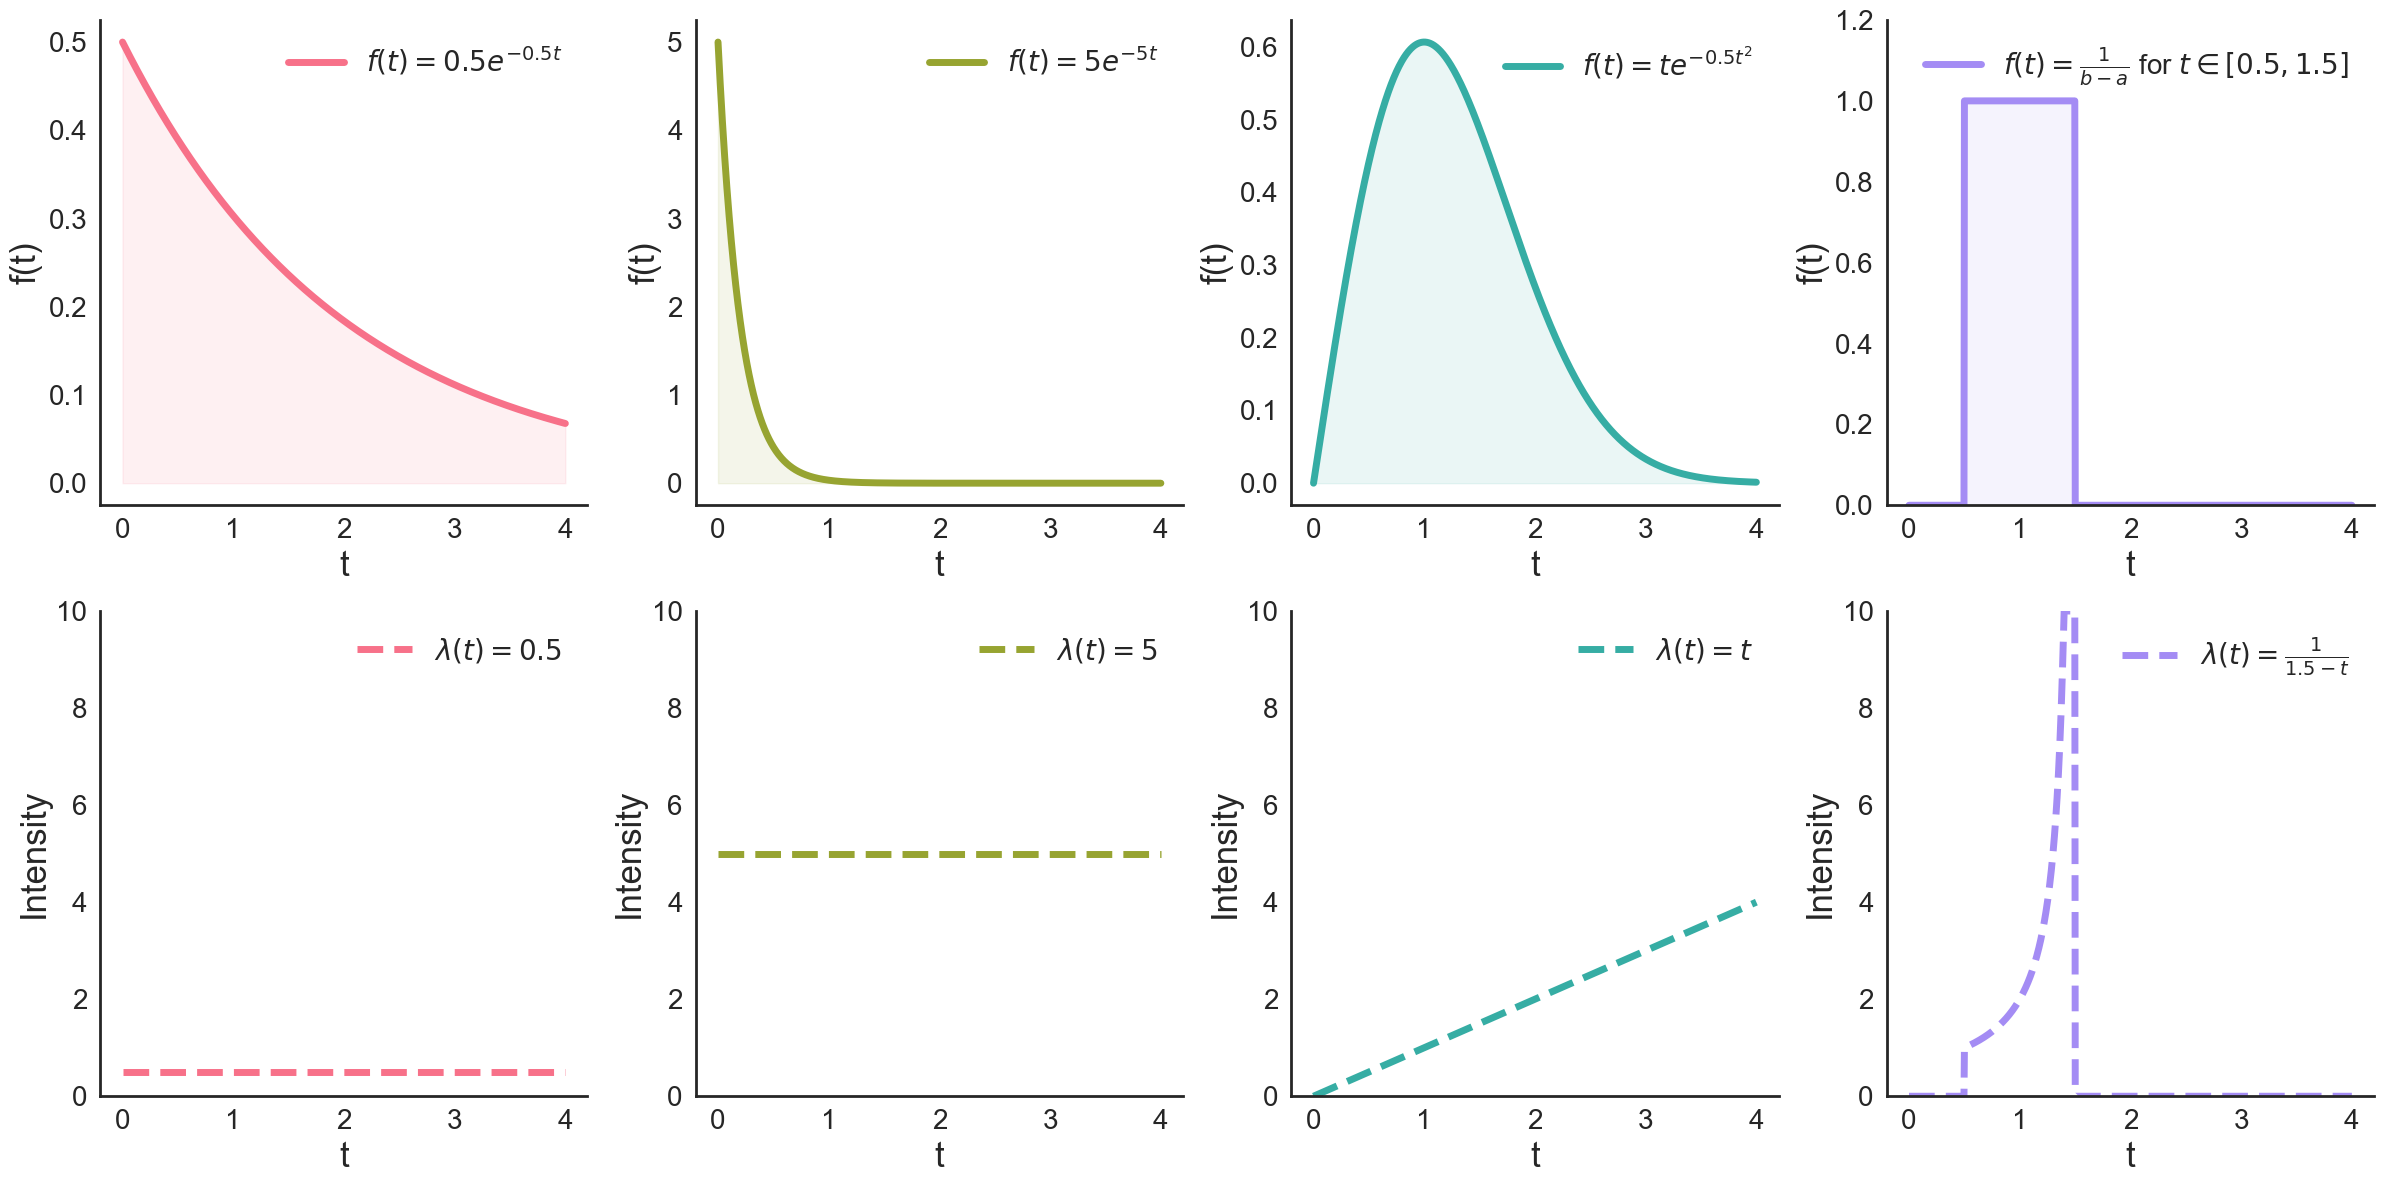

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
lambdas = [0.5, 5]
x_exp = np.linspace(0, 4, 1000)  # For exponential distributions
x_lin = np.linspace(0, 4, 1000)  # For linear intensity function
x_unif = np.linspace(0, 4, 1000)  # For uniform distribution

# Seaborn color palette
colors = sns.color_palette("husl", len(lambdas) + 2)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Plot for lambda = 0.5 and lambda = 5
for i, (lambda_param, color) in enumerate(zip(lambdas, colors[:len(lambdas)])):
    pdf = lambda_param * np.exp(-lambda_param * x_exp)
    intensity = np.full_like(x_exp, lambda_param)
    
    # Plot PDFs
    axes[0, i].plot(x_exp, pdf, linewidth=5, color=color, label=fr'$f(t) = {lambda_param} e^{{-{lambda_param} t}}$')
    axes[0, i].fill_between(x_exp, pdf, color=color, alpha=0.1)
    
    # Plot intensity functions
    axes[1, i].plot(x_exp, intensity, linestyle='--', linewidth=5, color=color, label=fr'$\lambda(t) = {lambda_param}$')

# Linear intensity function
a = 1  # Linear coefficient
linear_intensity = a * x_lin
linear_pdf = a * x_lin * np.exp(-0.5 * a * x_lin**2)

# Plot PDFs for linear intensity
axes[0, 2].plot(x_lin, linear_pdf, linewidth=5, color=colors[2], label=r'$f(t) = t e^{-0.5  t^2}$')
axes[0, 2].fill_between(x_lin, linear_pdf, color=colors[2], alpha=0.1)

# Plot linear intensity functions
axes[1, 2].plot(x_lin, linear_intensity, linestyle='--', linewidth=5, color=colors[2], label=r'$\lambda(t) =  t$')

# Uniform PDF
a, b = 0.5, 1.5  # Uniform interval
uniform_pdf = np.where((x_unif >= a) & (x_unif <= b), 1/(b-a), 0)
uniform_intensity = np.where((x_unif >= a) & (x_unif <= b), 1 / (b - x_unif), 0)
uniform_intensity = np.clip(uniform_intensity, 0, 10)  # Clip y-axis values to 10

# Plot PDFs for uniform distribution
axes[0, 3].plot(x_unif, uniform_pdf, linewidth=5, color=colors[3], label=r'$f(t) = \frac{1}{b-a}$ for $t \in [0.5, 1.5]$')
axes[0, 3].fill_between(x_unif, uniform_pdf, color=colors[3], alpha=0.1)
axes[0, 3].set_ylim([0, 1.2])  # Set y-axis limit for uniform PDF plots

# Plot uniform intensity functions
axes[1, 3].plot(x_unif, uniform_intensity, linestyle='--', linewidth=5, color=colors[3], label=r'$\lambda(t) = \frac{1}{1.5 - t}$')

# Set titles and labels for each subplot
titles = [r'$\text{PDF for } \lambda=0.5$', r'$\text{PDF for } \lambda=5$', 
          r'$\text{PDF for } \lambda(t)=at$', r'$\text{PDF for Uniform Distribution}$']
intensity_titles = [r'$\text{Intensity for } \lambda=0.5$', r'$\text{Intensity for } \lambda=5$', 
                    r'$\text{Intensity for } \lambda(t)=at$', r'$\text{Intensity for Uniform Distribution}$']

for i in range(4):
    # PDFs
    #axes[0, i].set_title(titles[i], fontsize=30)
    axes[0, i].set_xlabel('t', fontsize=25)
    axes[0, i].set_ylabel('f(t)', fontsize=25)
    axes[0, i].tick_params(axis='both', which='major', labelsize=20)
    axes[0, i].spines['top'].set_visible(False)
    axes[0, i].spines['right'].set_visible(False)
    axes[0, i].spines['bottom'].set_linewidth(2)
    axes[0, i].spines['left'].set_linewidth(2)
    axes[0, i].legend(loc='upper right', fontsize=20, frameon=False)
    
    # Intensity functions
    #axes[1, i].set_title(intensity_titles[i], fontsize=30)
    axes[1, i].set_xlabel('t', fontsize=25)
    axes[1, i].set_ylabel('Intensity', fontsize=25)
    axes[1, i].tick_params(axis='both', which='major', labelsize=20)
    axes[1, i].spines['top'].set_visible(False)
    axes[1, i].spines['right'].set_visible(False)
    axes[1, i].spines['bottom'].set_linewidth(2)
    axes[1, i].spines['left'].set_linewidth(2)
    axes[1, i].set_ylim([0, 10])  # Set y-axis limit for intensity plots
    axes[1, i].legend(loc='upper right', fontsize=20, frameon=False)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("exp_pdfs_and_intensities_separate.pdf", bbox_inches='tight')

# Display the plot
plt.show()


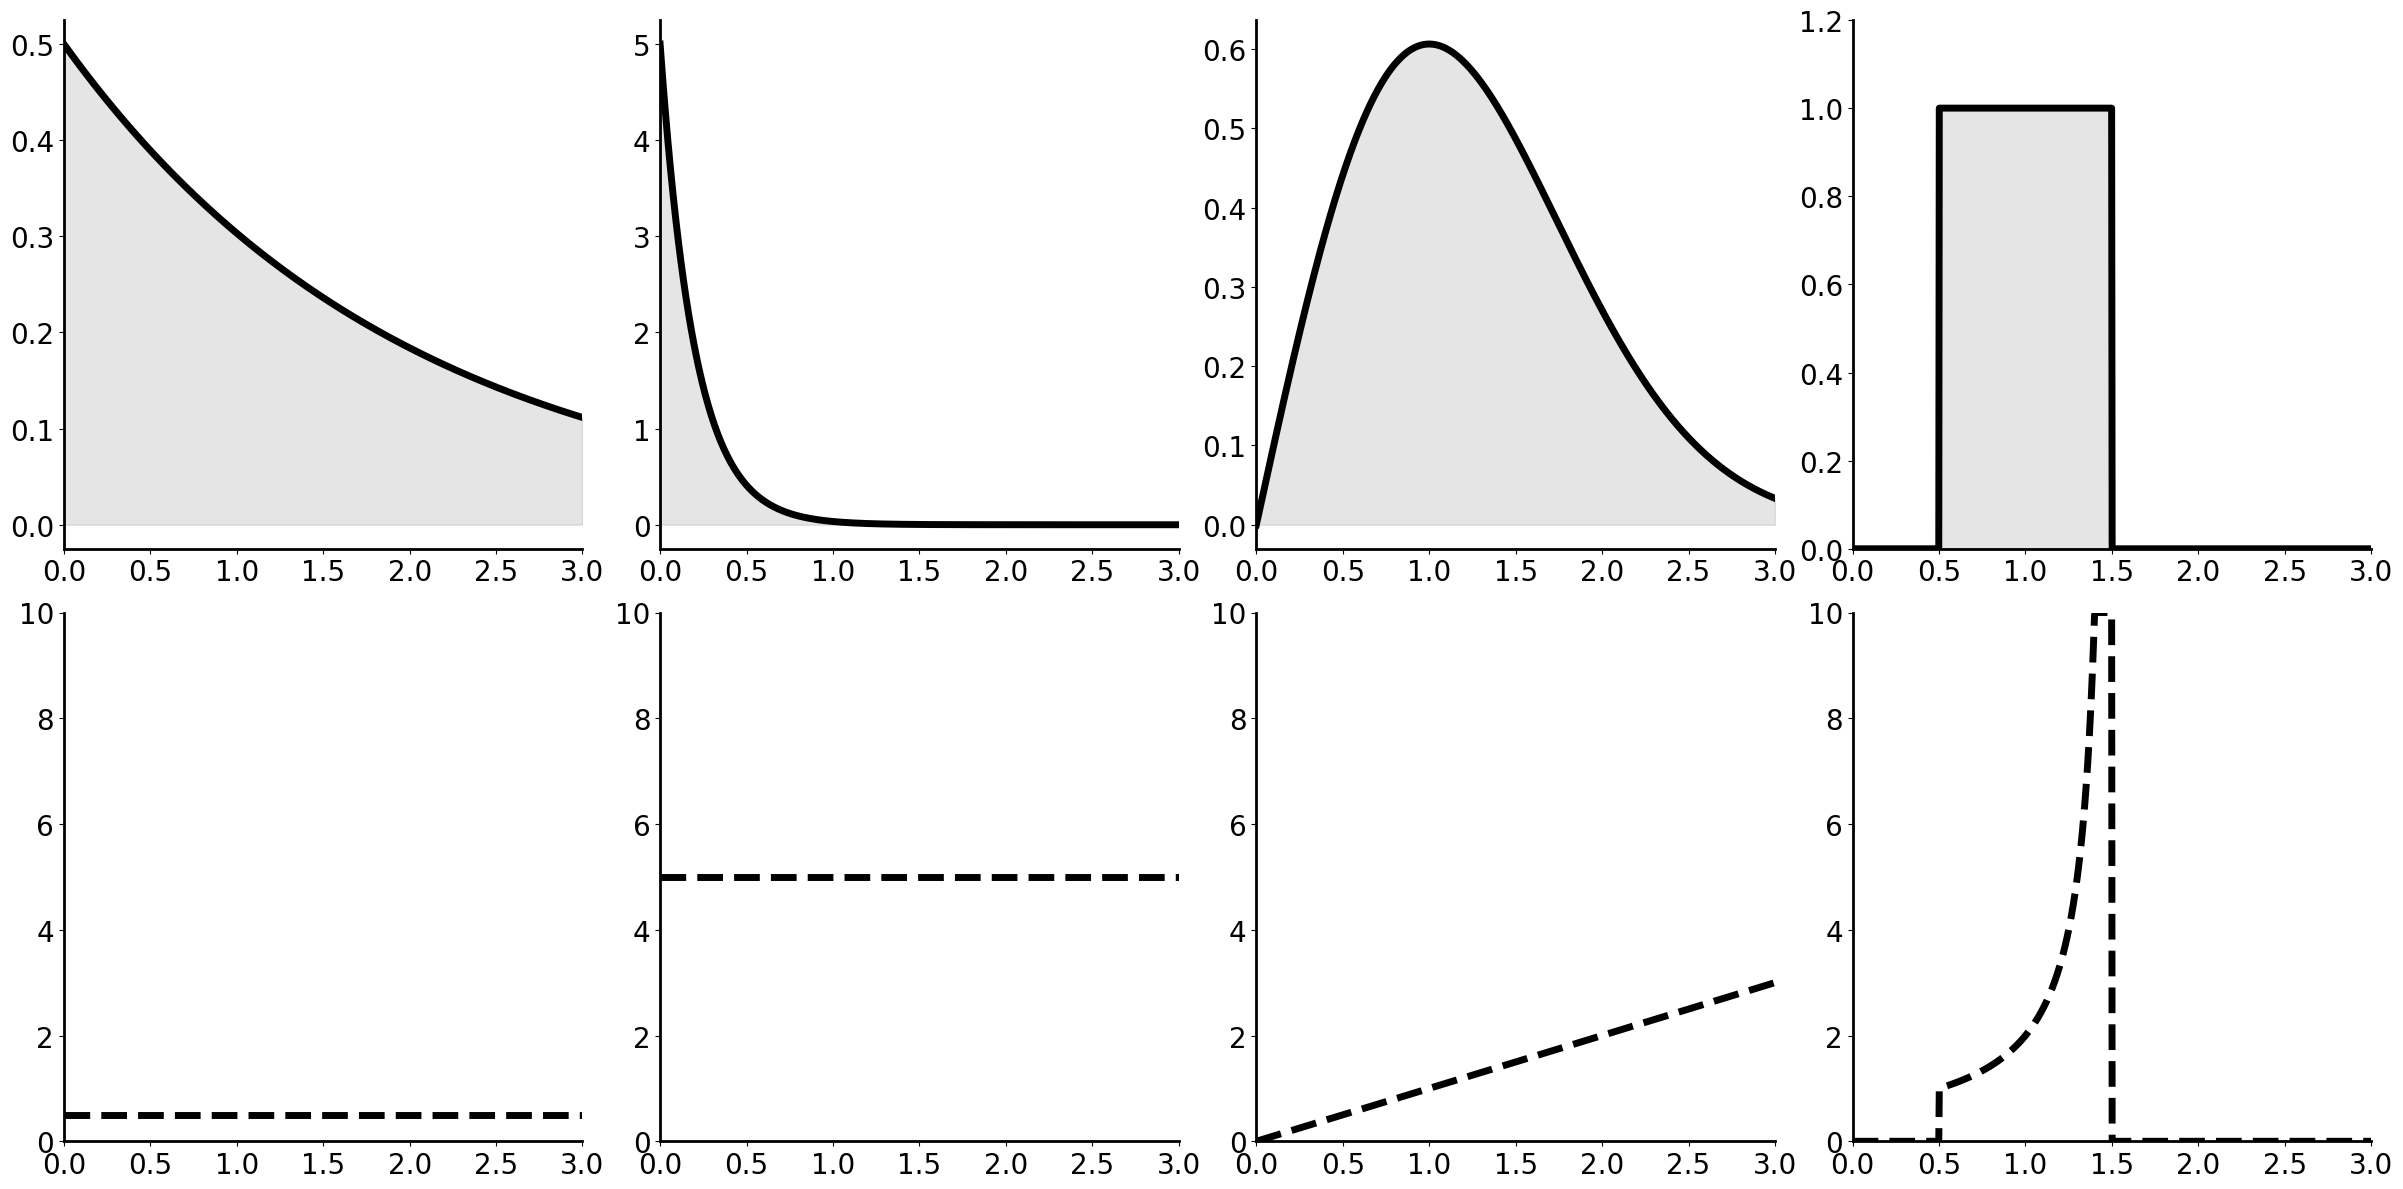

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdas = [0.5, 5]
x_exp = np.linspace(0, 3, 1000)  # Extend x-axis to 3 for exponential distributions
x_lin = np.linspace(0, 3, 1000)  # For linear intensity function
x_unif = np.linspace(0, 3, 1000)  # For uniform distribution

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Plot for lambda = 0.5 and lambda = 5
for i, lambda_param in enumerate(lambdas):
    pdf = lambda_param * np.exp(-lambda_param * x_exp)
    intensity = np.full_like(x_exp, lambda_param)
    
    # Plot PDFs
    axes[0, i].plot(x_exp, pdf, linewidth=5, color='black')
    axes[0, i].fill_between(x_exp, pdf, color='black', alpha=0.1)
    
    # Plot intensity functions
    axes[1, i].plot(x_exp, intensity, linestyle='--', linewidth=5, color='black')

# Linear intensity function
a = 1  # Linear coefficient
linear_intensity = a * x_lin
linear_pdf = a * x_lin * np.exp(-0.5 * a * x_lin**2)

# Plot PDFs for linear intensity
axes[0, 2].plot(x_lin, linear_pdf, linewidth=5, color='black')
axes[0, 2].fill_between(x_lin, linear_pdf, color='black', alpha=0.1)

# Plot linear intensity functions
axes[1, 2].plot(x_lin, linear_intensity, linestyle='--', linewidth=5, color='black')

# Uniform PDF
a, b = 0.5, 1.5  # Uniform interval
uniform_pdf = np.where((x_unif >= a) & (x_unif <= b), 1/(b-a), 0)
uniform_intensity = np.where((x_unif >= a) & (x_unif <= b), 1 / (b - x_unif), 0)
uniform_intensity = np.clip(uniform_intensity, 0, 10)  # Clip y-axis values to 10

# Plot PDFs for uniform distribution
axes[0, 3].plot(x_unif, uniform_pdf, linewidth=5, color='black')
axes[0, 3].fill_between(x_unif, uniform_pdf, color='black', alpha=0.1)
axes[0, 3].set_ylim([0, 1.2])  # Set y-axis limit for uniform PDF plots

# Plot uniform intensity functions
axes[1, 3].plot(x_unif, uniform_intensity, linestyle='--', linewidth=5, color='black')

# Set titles and labels for each subplot
titles = [r'$\text{PDF for } \lambda=0.5$', r'$\text{PDF for } \lambda=5$', 
          r'$\text{PDF for } \lambda(t)=at$', r'$\text{PDF for Uniform Distribution}$']
intensity_titles = [r'$\text{Intensity for } \lambda=0.5$', r'$\text{Intensity for } \lambda=5$', 
                    r'$\text{Intensity for } \lambda(t)=at$', r'$\text{Intensity for Uniform Distribution}$']

for i in range(4):
    # PDFs
    axes[0, i].set_xlim([0, 3])  # Set x-axis limit to 3
    axes[0, i].tick_params(axis='both', which='major', labelsize=20)
    axes[0, i].spines['top'].set_visible(False)
    axes[0, i].spines['right'].set_visible(False)
    axes[0, i].spines['bottom'].set_linewidth(2)
    axes[0, i].spines['left'].set_linewidth(2)
    
    # Intensity functions
    axes[1, i].set_xlim([0, 3])  # Set x-axis limit to 3
    axes[1, i].tick_params(axis='both', which='major', labelsize=20)
    axes[1, i].spines['top'].set_visible(False)
    axes[1, i].spines['right'].set_visible(False)
    axes[1, i].spines['bottom'].set_linewidth(2)
    axes[1, i].spines['left'].set_linewidth(2)
    axes[1, i].set_ylim([0, 10])  # Set y-axis limit for intensity plots

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("exp_pdfs_and_intensities_black.pdf", bbox_inches='tight')

# Display the plot
plt.show()


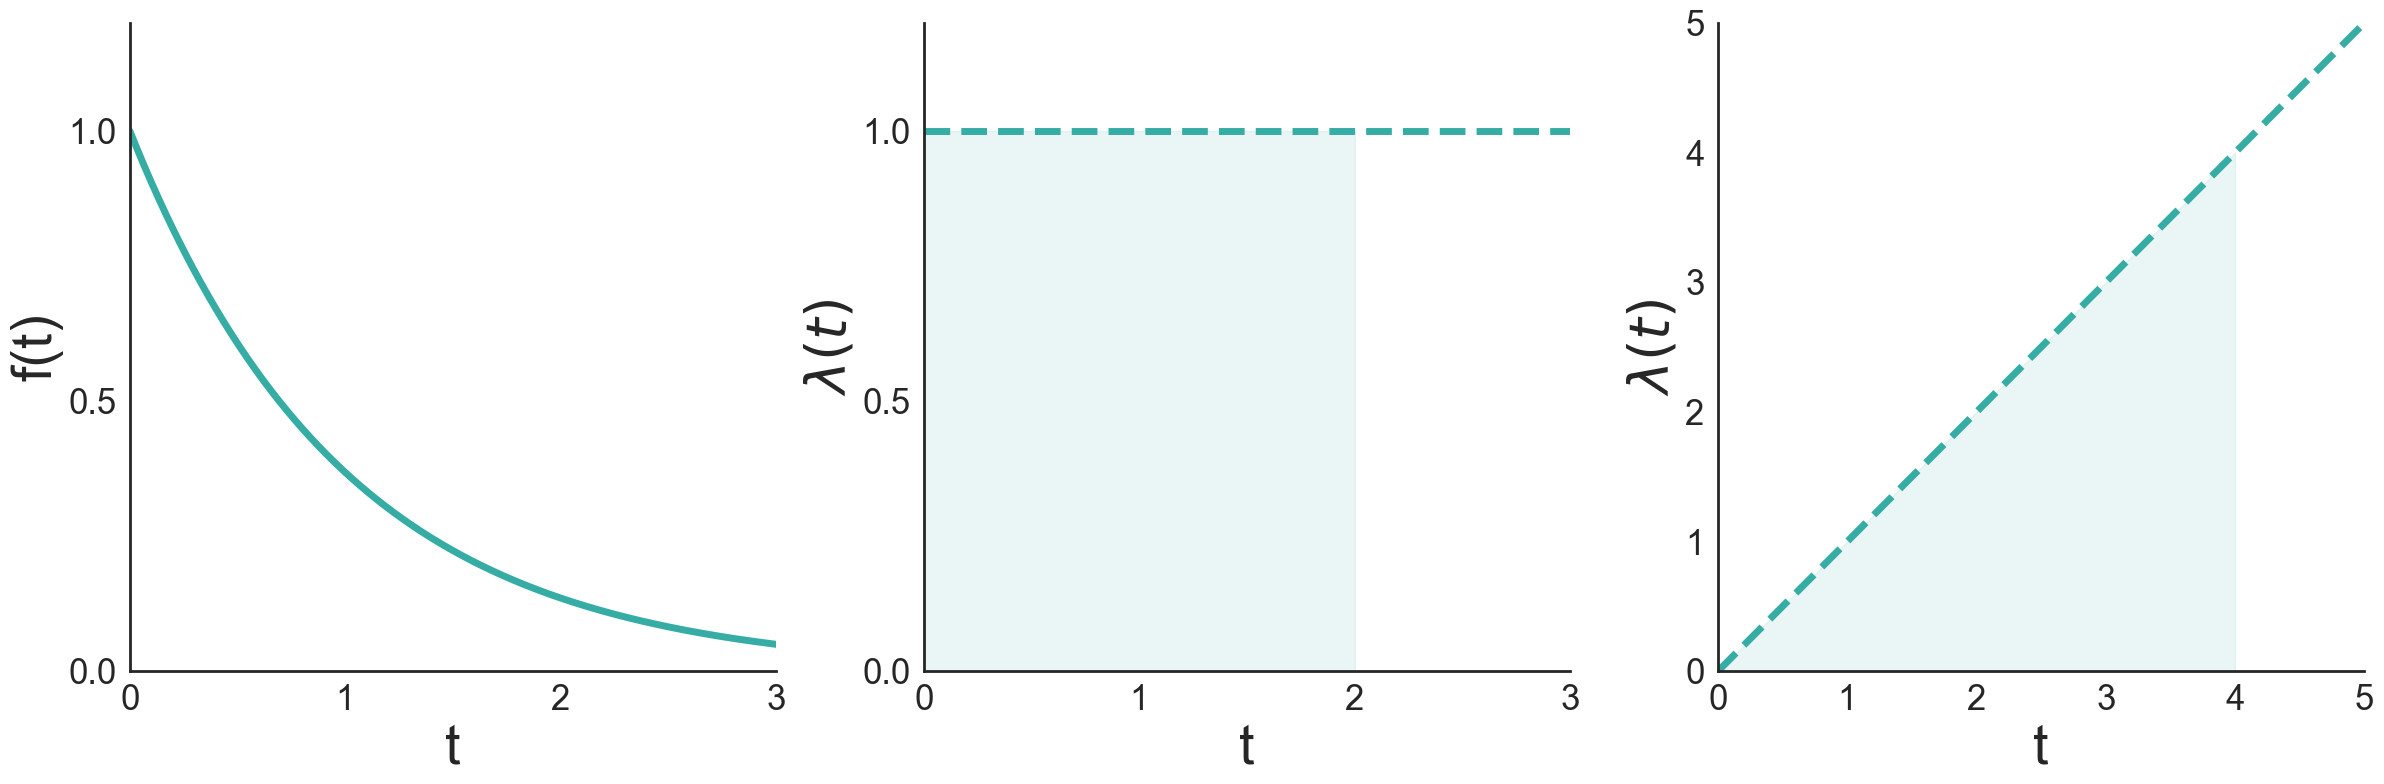

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style without grid
sns.set(style="white")

# Choose a Seaborn color (second one from the "husl" palette)
color = sns.color_palette("husl", 2)[1]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Parameters for the first plot
lambda_exp = 1
x_exp = np.linspace(0, 3, 1000)
pdf_exp = lambda_exp * np.exp(-lambda_exp * x_exp)

# Plot the PDF of the exponential distribution with rate 1
axes[0].plot(x_exp, pdf_exp, linewidth=5, color=color)
axes[0].set_xlim([0, 3])
axes[0].set_ylim([0, 1.2])
axes[0].set_xlabel('t', fontsize=40)
axes[0].set_ylabel('f(t)', fontsize=40)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_linewidth(2)
axes[0].spines['left'].set_linewidth(2)
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_yticks([0, 0.5, 1.0])

# Parameters for the second plot
x_intensity = np.linspace(0, 3, 1000)
intensity_const = np.full_like(x_intensity, 1)

# Plot the constant intensity function with shaded area
axes[1].plot(x_intensity, intensity_const, linewidth=5, color=color, linestyle='--')
axes[1].fill_between(x_intensity[:667], intensity_const[:667], color=color, alpha=0.1)
axes[1].set_xlim([0, 3])
axes[1].set_ylim([0, 1.2])
axes[1].set_xlabel('t', fontsize=40)
axes[1].set_ylabel(r'$\lambda(t)$', fontsize=40)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_linewidth(2)
axes[1].spines['left'].set_linewidth(2)
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_yticks([0, 0.5, 1.0])

# Parameters for the third plot
x_lin_intensity = np.linspace(0, 5, 1000)
linear_intensity = x_lin_intensity

# Plot the linearly increasing intensity function with shaded area
axes[2].plot(x_lin_intensity, linear_intensity, linewidth=5, color=color, linestyle='--')
axes[2].fill_between(x_lin_intensity[:800], linear_intensity[:800], color=color, alpha=0.1)
axes[2].set_xlim([0, 5])
axes[2].set_ylim([0, 5])
axes[2].set_xlabel('t', fontsize=40)
axes[2].set_ylabel(r'$\lambda(t)$', fontsize=40)
axes[2].tick_params(axis='both', which='major', labelsize=25)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['bottom'].set_linewidth(2)
axes[2].spines['left'].set_linewidth(2)
axes[2].set_xticks([0, 1, 2, 3, 4, 5])
axes[2].set_yticks([0, 1, 2, 3, 4, 5])

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("three_plots_in_a_row.pdf", bbox_inches='tight')

# Display the plot
plt.show()


# Heterogeneous Temporal Point Process (with Hawkes and self-correcting kernel)

In [130]:
import numpy as np

# Exponential kernel intensity function for a Hawkes process
def hawkes_intensity(t, events, mu=0.25, alpha=0.7, beta=0.5):
    intensity = mu
    for t_i in events:
        if t_i < t:
            intensity += alpha * np.exp(-beta * (t - t_i))
    return intensity

def self_correcting_intensity(t, events, mu=0.4, alpha=1.0):
    """
    Calculate the intensity of a self-correcting point process at time t.

    Parameters:
    t (float): Current time
    events (list of float): Times of previous events
    mu (float): Base rate parameter
    alpha (float): Self-correcting parameter

    Returns:
    float: Intensity at time t
    """
    N_t = len(events)  # Number of events up to time t
    return np.exp(mu * t - alpha * N_t)

def sample_event_time_stepwise(intensity_func, events, h, step_size=0.001):
    t = events[-1] if events else 0
    while True:
        t += step_size
        prob = intensity_func(t, events) * step_size
        if np.random.random() < prob:
            return t
        if t > h:
            return h

def sample_event_time_numerical_integration(intensity_func, events, h, step_size=0.001):
    t = events[-1] if events else 0
    while True:
        # Sample the inter-event time from an exponential distribution with rate 1
        delta_t = np.random.exponential(1)
        # Use numerical integration to find the corresponding event time
        cumulative_intensity = 0
        while cumulative_intensity < delta_t:
            t += step_size
            cumulative_intensity += intensity_func(t, events) * step_size
            if t > h:
                return h
        return t

def sample_event_time_poisson(intensity_func, events, h, upper_bound):
    t = events[-1] if events else 0
    while True:
        # Sample candidate event time from exponential distribution with rate upper_bound
        delta_t = np.random.exponential(1 / upper_bound)
        t += delta_t
        if t > h:
            return h
        # Accept the candidate with probability intensity_func(t, events) / upper_bound
        if np.random.random() < intensity_func(t, events) / upper_bound:
            return t

def sample_inhomogeneous_point_process(h, intensity_func, method='stepwise', upper_bound=None, step_size=0.001):
    # Input: time horizon h > 0, intensity function, sampling method
    # Output: list of event times
    assert upper_bound is None or step_size is None
    events = []
    t = 0
    while t < h:
        if method == 'stepwise':
            t_next = sample_event_time_stepwise(intensity_func, events, h, step_size)
        elif method == 'numerical_integration':
            t_next = sample_event_time_numerical_integration(intensity_func, events, h, step_size)
        elif method == 'poisson':
            t_next = sample_event_time_poisson(intensity_func, events, h, upper_bound)
        else:
            raise ValueError("Unknown method")
        t = t_next
        if t < h:  # If the updated time is within the time horizon, add it to the list
            events.append(t)
    return events

# Example usage
time_horizon = 10.0  # Time horizon h > 0
sample1 = sample_inhomogeneous_point_process(time_horizon, hawkes_intensity, method='stepwise', upper_bound=None, step_size=0.0001)
print("Sampled event times (stepwise):", sample1)

sample2 = sample_inhomogeneous_point_process(time_horizon, hawkes_intensity, method='numerical_integration', upper_bound=None, step_size=0.0001)
print("Sampled event times (numerical integration):", sample2)

sample3 = sample_inhomogeneous_point_process(time_horizon, hawkes_intensity, method='poisson', upper_bound=10.0, step_size=None)
print("Sampled event times (poisson):", sample3)


Sampled event times (stepwise): [0.5360999999999573, 0.629299999999947, 0.9411999999999127, 1.0616999999998995, 1.1494999999998898, 1.4328999999998586, 2.812600000001511, 3.148100000002219, 3.1905000000023085, 3.201200000002331, 3.50390000000297, 3.543700000003054, 3.5896000000031507, 4.006000000004002, 4.009100000003995, 4.118300000003741, 4.14010000000369, 4.449900000002968, 4.5144000000028175, 4.514800000002817, 4.545800000002744, 4.553800000002726, 4.847100000002042, 5.253400000001095, 5.330700000000915, 5.376500000000808, 5.394500000000766, 5.6360000000002035, 5.6622000000001425, 5.664100000000138, 5.709000000000033, 5.714400000000021, 5.86939999999966, 5.893999999999602, 5.962199999999443, 5.963899999999439, 5.968999999999427, 5.973999999999416, 6.109999999999099, 6.132999999999045, 6.150999999999003, 6.156099999998991, 6.361399999998513, 6.4280999999983575, 6.434299999998343, 6.437199999998336, 6.480099999998236, 6.5211999999981405, 6.544599999998086, 6.589099999997982, 6.600699

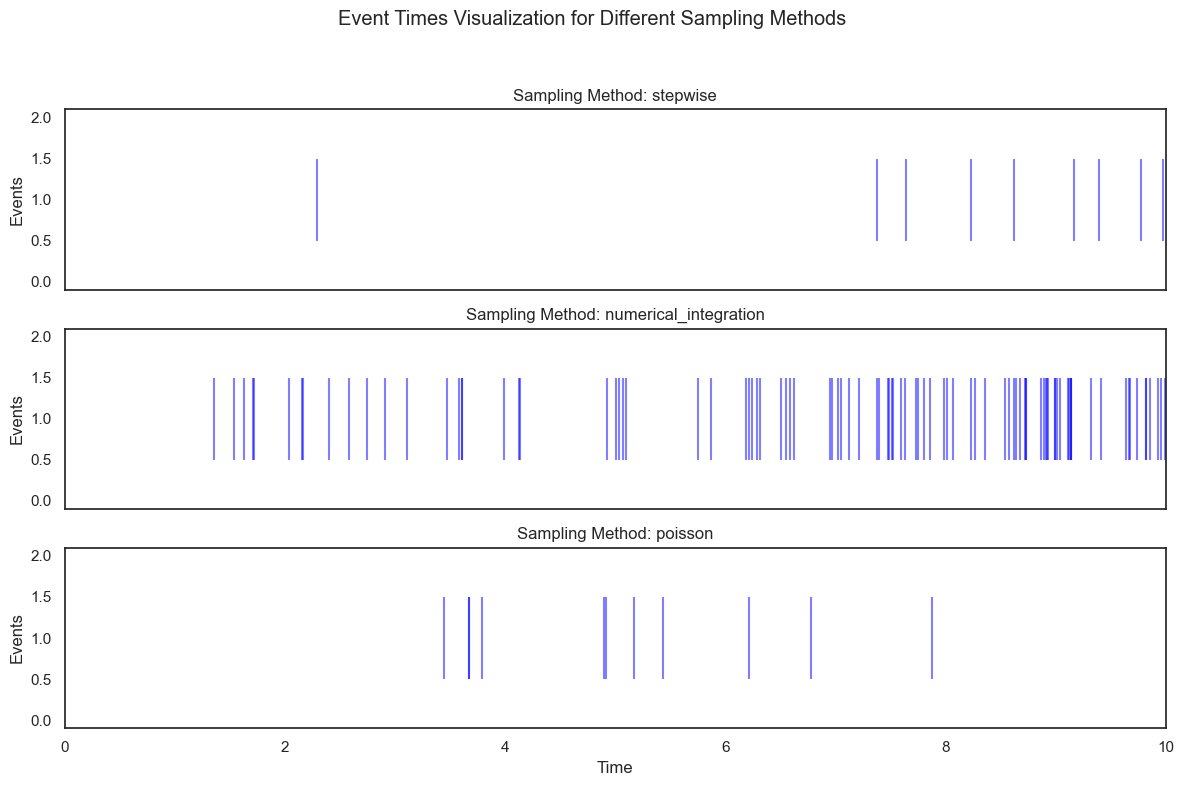

In [120]:
# Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Event Times Visualization for Different Sampling Methods')

for ax, sample, method in zip(axs, [sample1, sample2, sample3], ["stepwise", "numerical_integration", "poisson"]):
    ax.eventplot(sample, orientation='horizontal', colors='blue', alpha=0.5)
    #ax.scatter(sample, np.zeros_like(sample), edgecolor='blue', facecolor='none', alpha=0.5)
    ax.set_title(f'Sampling Method: {method}')
    ax.set_xlim(0, time_horizon)
    ax.set_ylabel('Events')

axs[-1].set_xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("hawkes_out.pdf")
plt.show()

Sampled event times (stepwise): [0.6142999999999487, 2.7625000000014053, 3.6526000000032837, 6.9077999999972395, 8.4261999999937, 9.16039999999199]
Sampled event times (numerical integration): [0.03760000000000005, 0.992299999999907, 5.579600000000335, 6.582299999997998, 8.944299999992493]
Sampled event times (poisson): [0.36953005541521494, 2.9217833776620745, 3.0140486249455773, 5.164975116738871, 9.281894781582572]


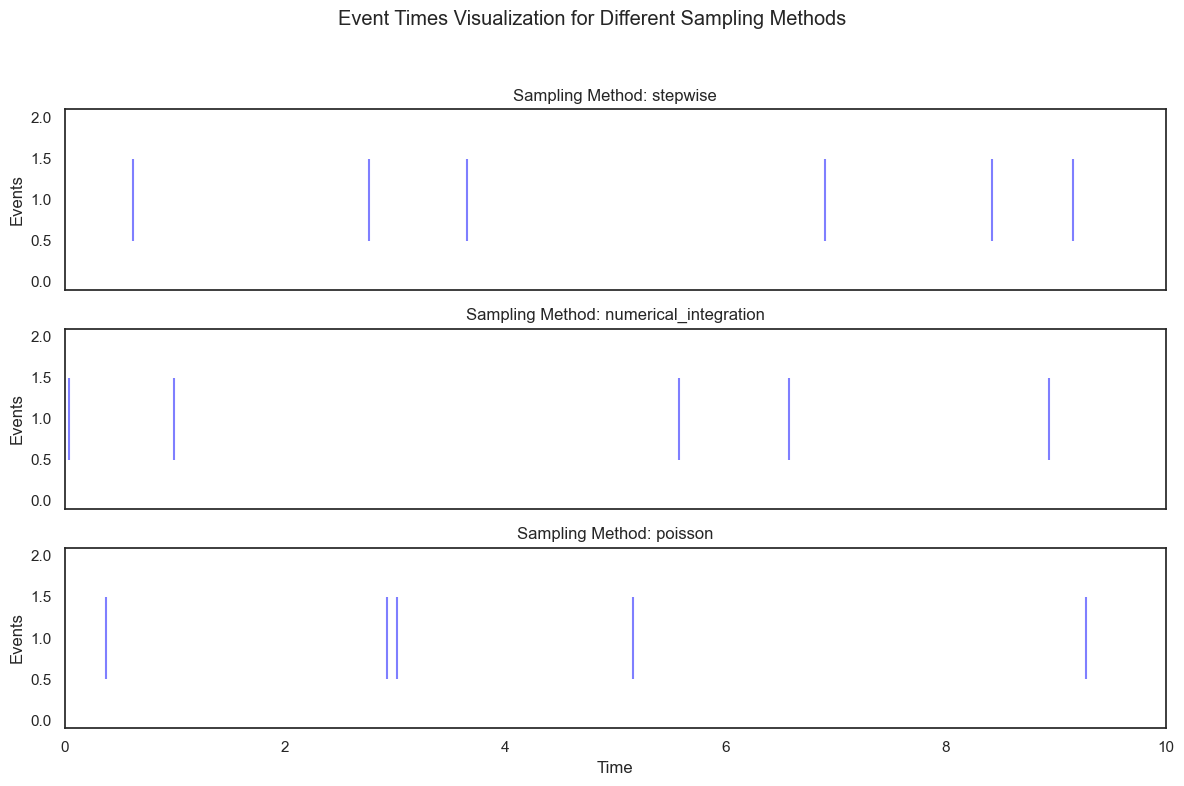

In [131]:
time_horizon = 10.0  # Time horizon h > 0
sample1 = sample_inhomogeneous_point_process(time_horizon, self_correcting_intensity, method='stepwise', upper_bound=None, step_size=0.0001)
print("Sampled event times (stepwise):", sample1)

sample2 = sample_inhomogeneous_point_process(time_horizon, self_correcting_intensity, method='numerical_integration', upper_bound=None, step_size=0.0001)
print("Sampled event times (numerical integration):", sample2)

sample3 = sample_inhomogeneous_point_process(time_horizon, self_correcting_intensity, method='poisson', upper_bound=10.0, step_size=None)
print("Sampled event times (poisson):", sample3)


# Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Event Times Visualization for Different Sampling Methods')

for ax, sample, method in zip(axs, [sample1, sample2, sample3], ["stepwise", "numerical_integration", "poisson"]):
    ax.eventplot(sample, orientation='horizontal', colors='blue', alpha=0.5)
    #ax.scatter(sample, np.zeros_like(sample), edgecolor='blue', facecolor='none', alpha=0.5)
    ax.set_title(f'Sampling Method: {method}')
    ax.set_xlim(0, time_horizon)
    ax.set_ylabel('Events')

axs[-1].set_xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("self_correcting_out.pdf")
plt.show()

# Non-Homogeneous Temporal Point Process

In [123]:
import numpy as np

def sample_event_time_stepwise(intensity_func, events, h, step_size=0.001):
    t = events[-1] if events else 0
    while True:
        t += step_size
        prob = intensity_func(t, events) * step_size
        if np.random.random() < prob:
            return t
        if t > h:
            return h
        
def sample_event_time_numerical_integration(intensity_func, events, h, step_size=0.001):
    t = events[-1] if events else 0
    while True:
        # Sample the inter-event time from an exponential distribution with rate 1
        delta_t = np.random.exponential(1)
        # Use numerical integration to find the corresponding event time
        cumulative_intensity = 0
        while cumulative_intensity < delta_t:
            t += step_size
            cumulative_intensity += intensity_func(t, events) * step_size
            if t > h:
                return h
        return t

def sample_event_time_poisson(intensity_func, events, h, upper_bound):
    t = events[-1] if events else 0
    while True:
        # Sample candidate event time from exponential distribution with rate upper_bound
        delta_t = np.random.exponential(1 / upper_bound)
        t += delta_t
        if t > h:
            return h
        # Accept the candidate with probability intensity_func(t_candidate, events) / upper_bound
        if np.random.random() < intensity_func(t, events) / upper_bound:
            return t

def sample_inhomogeneous_point_process(h, intensity_func, method='stepwise', upper_bound=None, step_size=0.001):
    # Input: time horizon h > 0, intensity function, sampling method
    # Output: list of event times
    assert upper_bound is None or step_size is None
    events = []
    t = 0
    while t < h:
        if method == 'stepwise':
            t_next = sample_event_time_stepwise(intensity_func, events, h, step_size)
        elif method == 'numerical_integration':
            t_next = sample_event_time_numerical_integration(intensity_func, events, h, step_size)
        elif method == 'poisson':
            t_next = sample_event_time_poisson(intensity_func, events, h, upper_bound)
        else:
            raise ValueError("Unknown method")
        t = t_next
        if t < h:  # If the updated time is within the time horizon, add it to the list
            events.append(t)
    return events

# Example intensity function
def example_intensity_func(t, events):
    # A simple intensity function that increases with the number of past events
    t_last = events[-1] if events else 0
    base_rate = 10.0 if np.abs(t-t_last) < 0.1 else 0.3
    return base_rate 

# Example usage
time_horizon = 10.  # Time horizon h > 0
sample1 = sample_inhomogeneous_point_process(time_horizon, example_intensity_func, method='stepwise', upper_bound=None, step_size=0.0001)
print("Sampled event times (stepwise):", sample)

sample2 = sample_inhomogeneous_point_process(time_horizon, example_intensity_func, method='numerical_integration', upper_bound=None, step_size=0.0001)
print("Sampled event times (numerical integration):", sample)

sample3 = sample_inhomogeneous_point_process(time_horizon, example_intensity_func, method='poisson', upper_bound=10.0, step_size=None)
print("Sampled event times (poisson):", sample)


Sampled event times (stepwise): [3.444826628948858, 3.6669829849368187, 3.667462194107767, 3.78745253398117, 4.894636170014661, 4.916470232286474, 5.170617579865835, 5.42951414457516, 6.211212098585102, 6.778765461719736, 7.875733001630242]
Sampled event times (numerical integration): [3.444826628948858, 3.6669829849368187, 3.667462194107767, 3.78745253398117, 4.894636170014661, 4.916470232286474, 5.170617579865835, 5.42951414457516, 6.211212098585102, 6.778765461719736, 7.875733001630242]
Sampled event times (poisson): [3.444826628948858, 3.6669829849368187, 3.667462194107767, 3.78745253398117, 4.894636170014661, 4.916470232286474, 5.170617579865835, 5.42951414457516, 6.211212098585102, 6.778765461719736, 7.875733001630242]


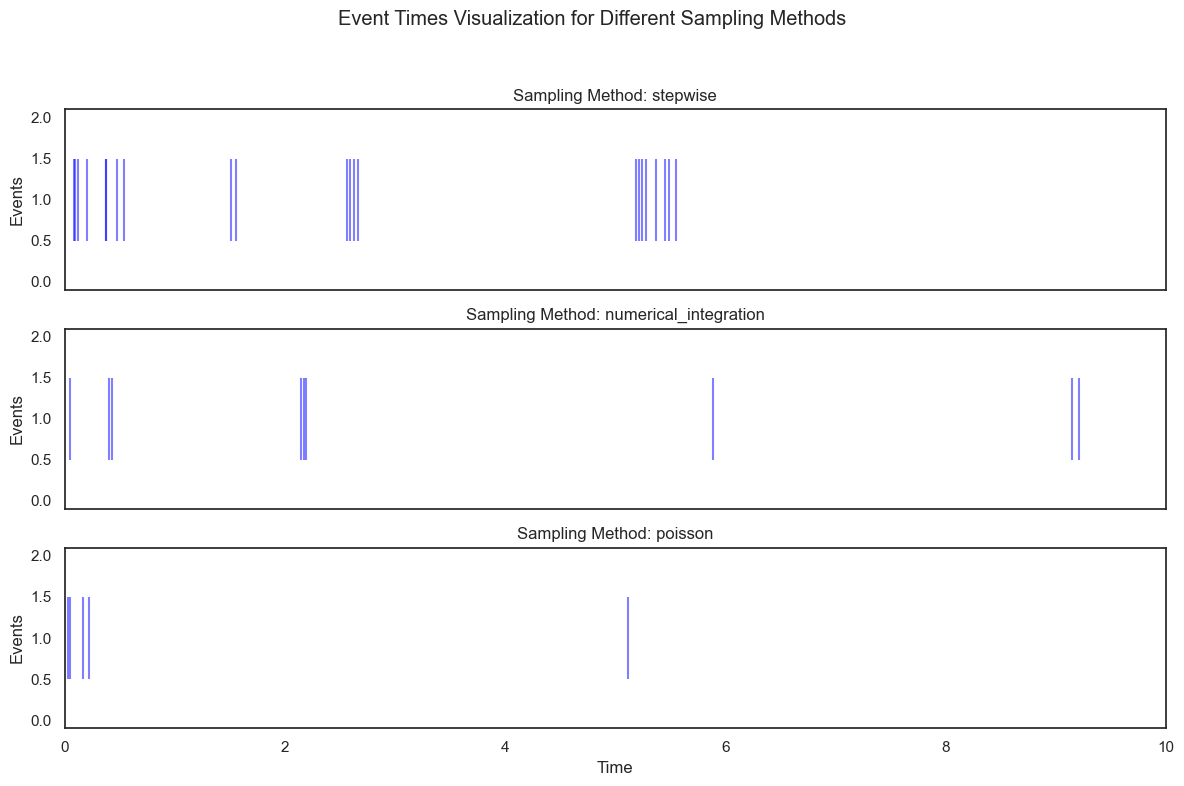

In [85]:
# Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Event Times Visualization for Different Sampling Methods')

for ax, sample, method in zip(axs, [sample1, sample2, sample3], ["stepwise", "numerical_integration", "poisson"]):
    ax.eventplot(sample, orientation='horizontal', colors='blue', alpha=0.5)
    #ax.scatter(sample, np.zeros_like(sample), edgecolor='blue', facecolor='none', alpha=0.5)
    ax.set_title(f'Sampling Method: {method}')
    ax.set_xlim(0, time_horizon)
    ax.set_ylabel('Events')

axs[-1].set_xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Spatio-Temporal Point Process

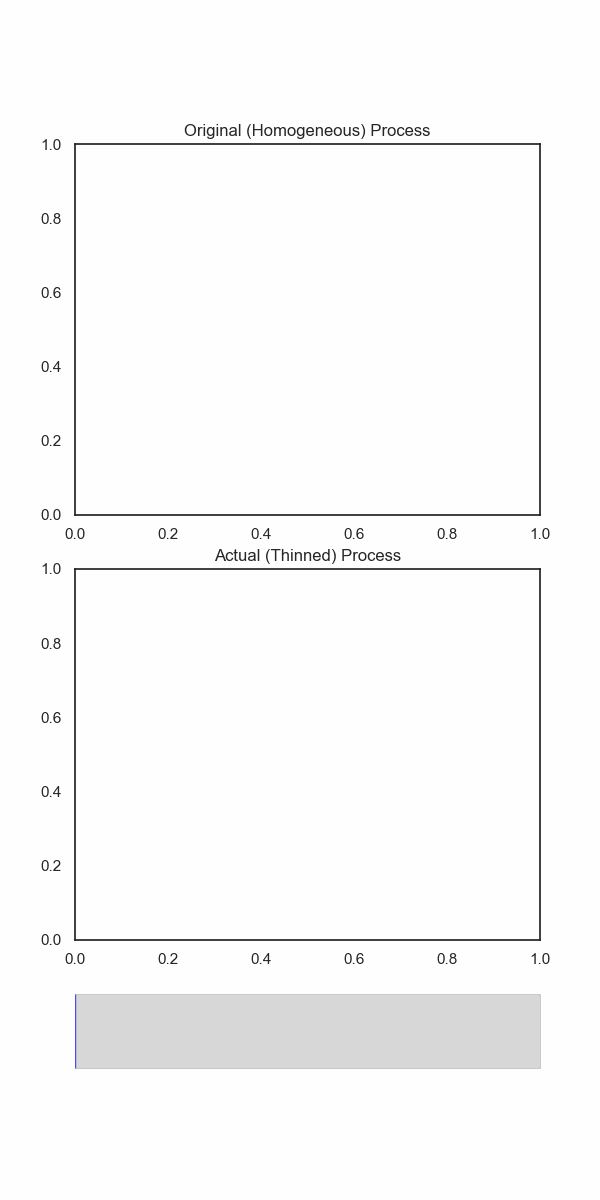

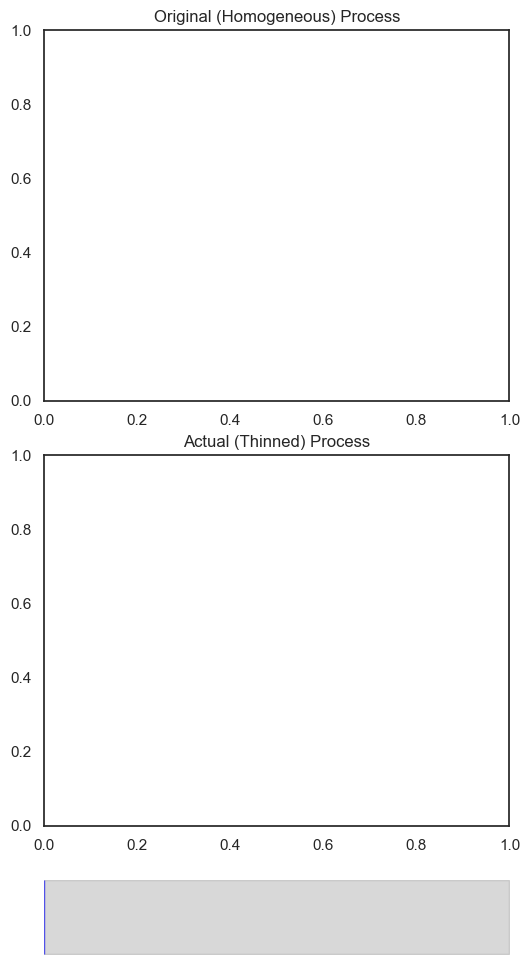

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image as IPImage

def sample_event_time(rate_max):
    return np.random.exponential(1 / rate_max)

def sample_event_position(space):
    return [np.random.uniform(low, high) for low, high in space]

def thinning_algorithm(rate_max, intensity_func, time_horizon, space=[[0, 1], [0, 1]]):
    original_events = []
    thinned_events = []
    t = 0
    while t < time_horizon:
        t_candidate = t + sample_event_time(rate_max)
        if t_candidate >= time_horizon:
            break
        position_candidate = sample_event_position(space)
        original_events.append((t_candidate, position_candidate))
        if np.random.random() < intensity_func(t_candidate, thinned_events, position_candidate) / rate_max:
            thinned_events.append((t_candidate, position_candidate))
        t = t_candidate
    return original_events, thinned_events

def example_intensity_func(t, events, position, base_rate=2.0, alpha=2.5, beta=2.0, spatial_sigma=0.1):
    intensity = base_rate
    for event_time, event_position in events:
        time_diff = t - event_time
        if time_diff > 0:
            temporal_component = alpha * np.exp(-beta * time_diff)
            spatial_component = np.exp(-np.sum((np.array(position) - np.array(event_position))**2) / (2 * spatial_sigma**2))
            intensity += temporal_component * spatial_component
    return min(intensity, rate_max)

# Simulation parameters
time_horizon = 10.0
rate_max = 20.0
space = [[0, 1], [0, 1]]
original_events, thinned_events = thinning_algorithm(rate_max, example_intensity_func, time_horizon, space)

# Visualization
fig, (ax1, ax2, ax_progress) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [5, 5, 1]}, figsize=(6, 12))
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax_progress.set_xlim(0, time_horizon)
ax_progress.set_ylim(0, 1)
ax_progress.axis('off')

def animate(i):
    current_time = (i / 10)
    ax1.clear()
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('Original (Homogeneous) Process')
    # Draw the original events
    for t, (time, pos) in enumerate(original_events):
        if time <= current_time:
            alpha = max(0, 1 - (current_time - time) / 2)  # Fade out faster
            circle = plt.Circle(pos, 0.02, edgecolor='blue', facecolor='none', alpha=alpha)
            ax1.add_patch(circle)

    ax2.clear()
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_title('Actual (Thinned) Process')
    # Draw the thinned events
    for t, (time, pos) in enumerate(thinned_events):
        if time <= current_time:
            alpha = max(0, 1 - (current_time - time) / 2)  # Fade out faster
            circle = plt.Circle(pos, 0.02, edgecolor='blue', facecolor='none', alpha=alpha)
            ax2.add_patch(circle)

    # Draw the progress bar
    ax_progress.clear()
    ax_progress.set_xlim(0, time_horizon)
    ax_progress.set_ylim(0, 1)
    ax_progress.fill_between([0, time_horizon], [0, 0], [1, 1], color='gray', alpha=0.3)
    ax_progress.fill_between([0, current_time], [0, 0], [1, 1], color='blue', alpha=0.6)
    ax_progress.axis('off')

ani = animation.FuncAnimation(fig, animate, frames=int(time_horizon * 10), interval=300, repeat=True)  # Slower animation

# Save animation as GIF
ani.save('spatio_temporal_process_comparison.gif', writer='pillow')

# Display the GIF
IPImage(filename='spatio_temporal_process_comparison.gif')
